- Nhà hàng cung cấp dịch vụ giao hàng online và offline, cái nào nhiều hơn?
- Loại nhà hàng nào được mọi người yêu thích hơn?
- Các cặp đôi thích mức giá nào cho bữa tối tại nhà hàng?

## Import libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [90]:
df = pd.read_csv('./Zomato_data.csv')
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


=> loại bỏ mẫu số của cột rate

In [91]:
def handleRate(rate):
    rate = rate.split('/')[0]
    return float(rate)

df['rate'] = df['rate'].apply(handleRate)
print(df.shape)
print("-------------------------------")
print(df.head())


(148, 7)
-------------------------------
                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


=> Không có giá trị NULL

Text(0.5, 0, 'Type of restaurant')

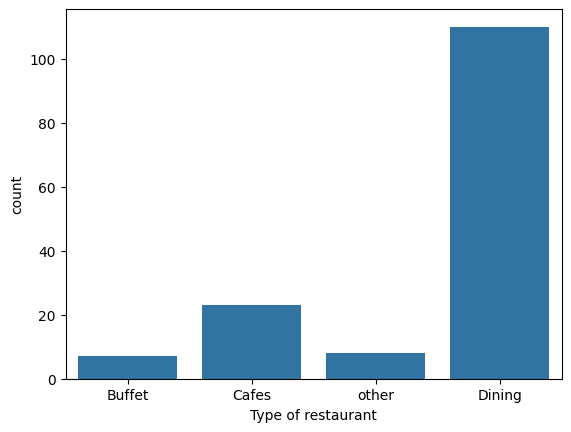

In [93]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

=> Phần lớn các nhà hàng thuộc loại Dinning

Text(0, 0.5, 'Votes')

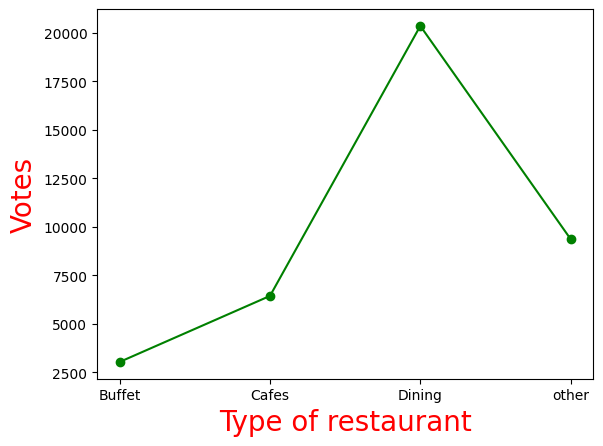

In [94]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

plt.plot(result, c='green', marker='o')
plt.xlabel("Type of restaurant", c='red', size=20)
plt.ylabel("Votes", c='red', size=20)

In [95]:
max_votes = df['votes'].max()
restaurant_max_votes = df.loc[df['votes'] == max_votes, 'name']
print(restaurant_max_votes)

38    Empire Restaurant
Name: name, dtype: object


In [96]:
grouped_data = df.groupby('listed_in(type)')['rate'].describe()
print(grouped_data.T)

listed_in(type)    Buffet      Cafes      Dining     other
count            7.000000  23.000000  110.000000  8.000000
mean             3.842857   3.765217    3.571818  3.912500
std              0.190238   0.391511    0.373707  0.679154
min              3.600000   3.000000    2.600000  2.800000
25%              3.750000   3.600000    3.300000  3.725000
50%              3.800000   3.800000    3.600000  4.200000
75%              3.950000   4.000000    3.800000  4.250000
max              4.100000   4.600000    4.400000  4.600000


{'whiskers': [<matplotlib.lines.Line2D at 0x1db481ca950>,
 'caps': [<matplotlib.lines.Line2D at 0x1db481cbd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db481ca210>,
 'medians': [<matplotlib.lines.Line2D at 0x1db481e4e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1db481e5790>,
 'means': []}

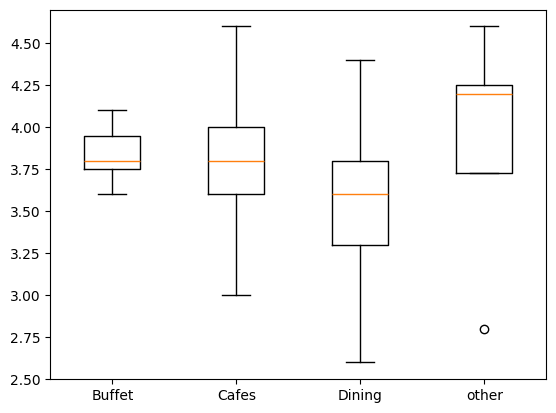

In [97]:
plt.boxplot(grouped_data.T.iloc[3:, :], labels=grouped_data.T.columns)

<Axes: xlabel='online_order', ylabel='count'>

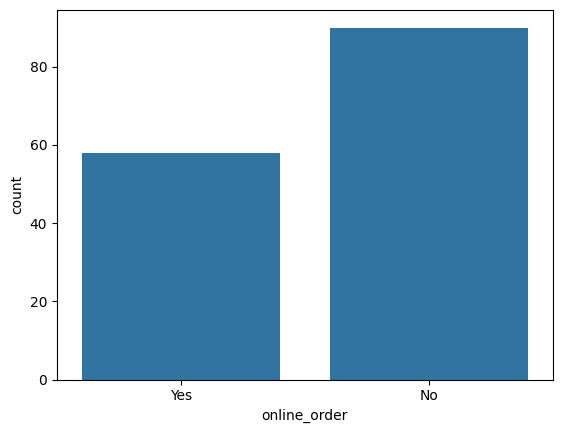

In [98]:
sns.countplot(x=df['online_order'])

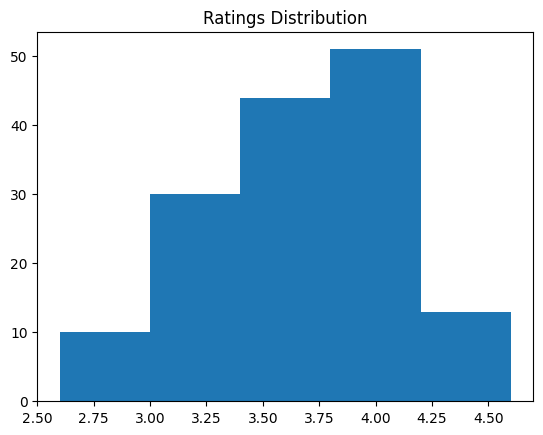

In [99]:
plt.hist(df['rate'], bins=5)
plt.title("Ratings Distribution")
plt.show()

=> Đa số là 3.5 đến 4 sao

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

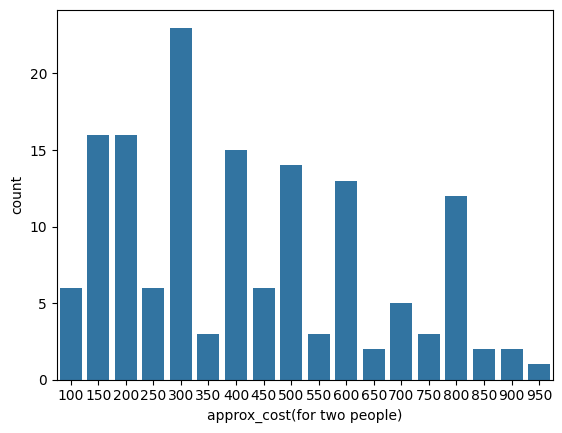

In [100]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

=> đa số các cặp đôi thích giá ~300

<Axes: xlabel='online_order', ylabel='rate'>

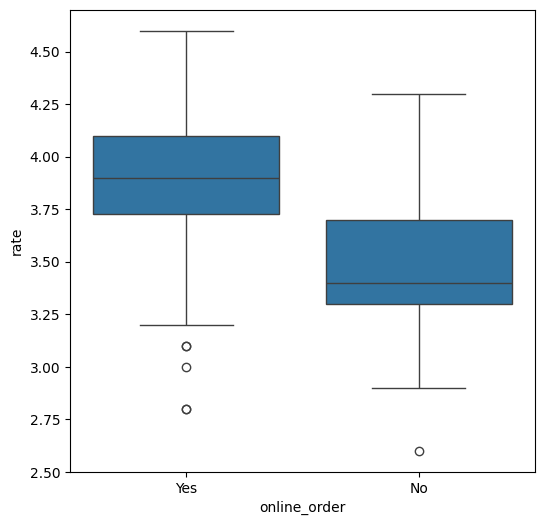

In [101]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)

=> các đơn online được đánh giá cao hơn offline

In [102]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


<Axes: xlabel='online_order', ylabel='listed_in(type)'>

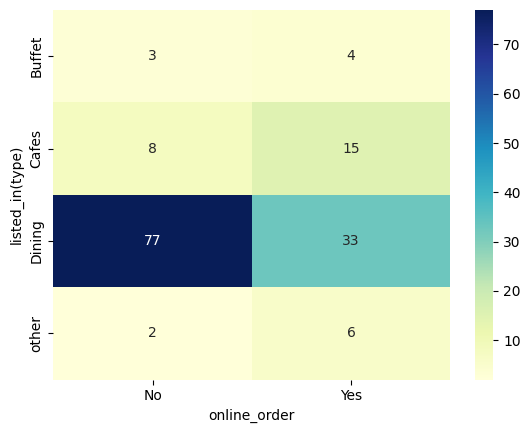

In [103]:
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')

=> khách hàng thích ăn uống tại nhà hàng hơn, khách hàng thích đặt hàng online hơn khi mua cafe